In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Data4.csv')

In [204]:
X = data.loc[:,['SN52_Change', 'SNOW_Change','SNWD_Change','AWND_Change','SX52_Change','PRCP_Change','TMIN_Change','WDF2_Change','WDF5_Change','WSF2_Change','WSF5_Change']]
Y = data.loc[:,'TMAX']

Xtrain, Xtest, Ytrain, Ytest=train_test_split(X,Y, test_size=0.25,random_state=100)
Xtrain, Xtest,Ytrain, Ytest=train_test_split(X,Y, test_size=0.25,random_state=100)
mean = Xtrain.mean(axis=0)
std = Xtrain.std(axis=0)
Xtrain = (Xtrain - mean) / std 
Xtest = (Xtest - mean) / std 

In [214]:
model = keras.Sequential([
    keras.layers.Dense(512, activation = tf.nn.relu, input_shape = (Xtrain.shape[1],), name = 'hidden_layer_1',),
    keras.layers.Dense(512, activation=tf.nn.relu,name='hidden_layer_2',),
    keras.layers.Dense(1, name = 'output_layer',)
])

optimizer = tf.keras.optimizers.Adam()
model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 512)               6144      
                                                                 
 hidden_layer_2 (Dense)      (None, 512)               262656    
                                                                 
 output_layer (Dense)        (None, 1)                 513       
                                                                 
Total params: 269,313
Trainable params: 269,313
Non-trainable params: 0
_________________________________________________________________



....................................................................................................
........

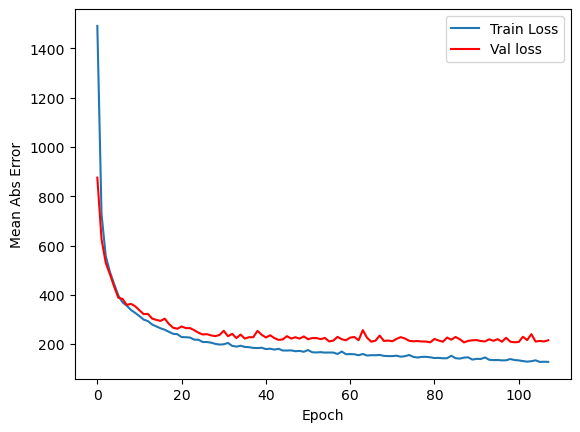

In [215]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['loss']), label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']), label = 'Val loss', color = 'red')
    plt.legend()
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20)
history = model.fit(Xtrain, Ytrain, epochs = 1000, validation_split = 0.2, verbose = 0, callbacks = [early_stop, PrintDot()])
plot_history(history)

32/32 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Neural Network Output')

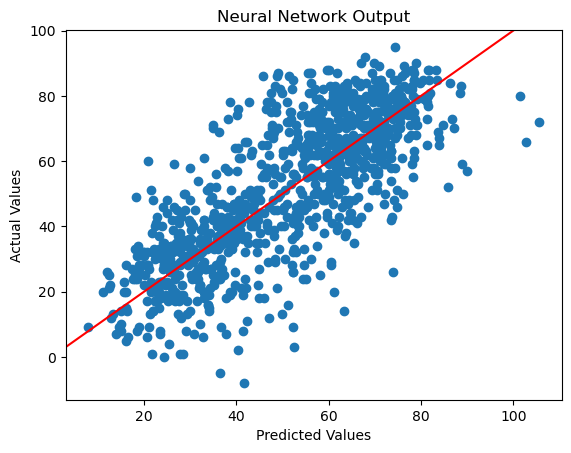

In [216]:
Ypredict = model.predict(Xtest)

plt.scatter(Ypredict, Ytest)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_=plt.plot([0,100], [0,100], color = 'red')
plt.title('Neural Network Output')


Text(0.5, 1.0, 'Error')

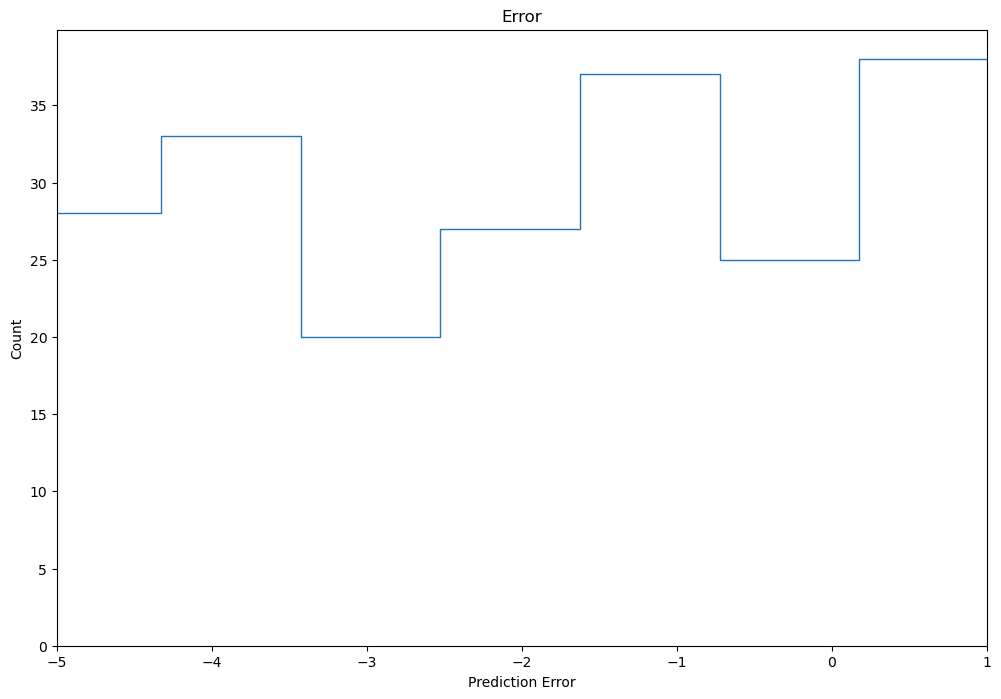

In [217]:
error = Ypredict.reshape(997,) - Ytest
plt.figure(figsize=(12, 8))
plt.xlim(-5, 1)
plt.hist(error,bins = 100, histtype = 'step')
plt.xlabel("Prediction Error")
_=plt.ylabel("Count")
plt.title('Error')

In [218]:
[loss, mae] = model.evaluate(Xtest, Ytest, verbose=0)
print('Mean Absolute Error:', mae)
mse = mean_squared_error(Ytest, Ypredict)
print('Mean Squared Error:', mse)

Mean Absolute Error: 10.945338249206543
Mean Squared Error: 202.11382680703505


In [219]:
from sklearn.metrics import r2_score
r2 = r2_score(Ytest, Ypredict)
print('R2 score:', r2)

R2 score: 0.5836943033762692


In [220]:
for b in Ypredict:
    print(b[0])

43.69108
86.31312
27.922306
33.848007
61.951145
64.195335
58.39326
67.64468
66.02035
36.6216
66.139984
64.43623
67.07958
38.53583
69.419655
51.179962
59.92642
71.42673
27.99021
65.8432
33.74428
56.756207
58.481976
38.582558
78.49966
48.8688
40.333042
32.148563
65.61945
26.37346
49.795834
67.76767
62.106014
65.288704
27.231562
68.894615
56.497158
56.7671
35.57892
61.670902
24.488947
37.51844
11.860046
12.342013
65.34768
74.392555
23.259367
30.165789
67.52305
56.855045
66.69561
73.04379
57.892536
57.38591
72.12738
28.355366
71.95407
61.66193
73.646034
74.41516
56.777714
58.930042
65.30489
69.283066
75.89988
39.12093
68.73054
23.385849
77.124596
56.804726
59.654232
101.35824
18.937935
41.457462
57.313206
67.61933
78.48791
59.564663
25.09182
57.061863
39.354248
38.608673
41.406837
34.86205
34.26106
59.948284
71.31953
57.342533
51.83991
30.779722
48.229465
58.49463
67.00533
55.733654
61.743458
56.834324
34.434254
55.10504
15.566009
47.487026
73.00622
69.50126
51.43314
37.595974
24.928104
29

In [221]:
print(Ytest," ")

845     45
3107    84
2875    35
2658    51
2707    63
        ..
2784    68
1515    33
3748    46
731      4
567     70
Name: TMAX, Length: 997, dtype: int64  


In [222]:
for a in Ytest:
    print(a)

45
84
35
51
63
47
66
70
84
30
41
57
71
20
81
59
71
82
43
54
16
62
75
39
87
86
64
21
62
46
81
59
70
72
33
68
40
55
52
56
33
35
26
25
62
58
20
36
58
73
84
62
71
62
66
1
59
78
43
95
50
50
42
51
86
33
67
19
82
75
88
80
28
19
67
64
85
72
18
53
39
78
36
25
21
88
63
67
73
7
58
67
43
68
39
47
27
24
23
81
79
71
69
58
44
34
37
61
56
85
46
65
79
46
68
62
58
31
83
37
67
44
43
76
42
33
61
64
77
23
17
18
28
39
85
49
63
66
62
87
20
40
35
45
70
60
80
66
57
73
52
78
55
45
62
59
36
56
46
45
37
71
26
18
18
35
64
2
86
43
62
46
76
0
62
27
46
75
25
-5
17
79
35
22
66
24
62
75
67
41
26
21
34
81
17
21
22
79
61
36
28
74
47
43
34
71
75
13
44
76
24
20
26
57
66
74
77
72
72
23
47
61
40
26
29
79
51
20
17
45
80
28
25
35
85
83
41
68
58
49
34
25
84
67
81
40
90
53
51
77
34
57
52
71
63
63
48
62
88
7
82
38
75
44
31
28
17
72
77
70
56
74
69
55
21
83
7
90
28
42
48
11
81
32
46
57
25
57
50
5
78
48
60
43
63
71
63
78
74
18
74
37
38
31
63
80
6
37
75
31
66
57
65
25
70
77
1
18
84
41
42
58
34
12
85
80
36
73
54
35
76
79
70
42
22
51
3